## This is velocyto test on 10x 1k Brain Cells
https://support.10xgenomics.com/single-cell-gene-expression/datasets/3.0.0/neuron_1k_v3

In [12]:
import velocyto as vcy
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [79]:
vlm = vcy.VelocytoLoom("test.loom")

In [104]:
vlm.ra['Gene'][np.char.startswith(vlm.ra['Gene'].astype(str), 'I')]

array(['Ikzf2', 'Igfbp5', 'Inhbb', 'Igfbp2', 'Itm2c', 'Ildr2', 'Igsf8',
       'Ifngr1', 'Igfbp3', 'Igfbp4', 'Id2', 'Ifrd1', 'Itgb8', 'Inf2',
       'Itga1', 'Inhba', 'Id4', 'Il6st', 'Itm2b', 'Ipo5', 'Ifngr2',
       'Itsn1', 'Isoc1', 'Incenp', 'Ina', 'Itga6', 'Itga4', 'Intu',
       'Itgb3bp', 'Igsf21', 'Il11ra1', 'Ift74', 'Igfbp7', 'Insig1',
       'Ica1', 'Impdh1', 'Iqsec1', 'Itpr1', 'Idh2', 'Iqgap1', 'Irf2',
       'Isyna1', 'Itgb1', 'Impdh2', 'Itm2a'], dtype=object)

In [80]:
vlm.ts = np.column_stack([vlm.ca["_X"], vlm.ca["_Y"]])

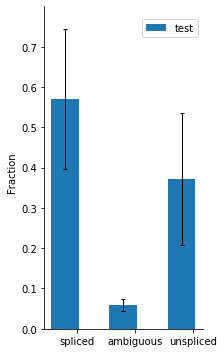

In [81]:
vlm.plot_fractions()

In [82]:
vlm.filter_cells(bool_array=vlm.initial_Ucell_size > np.percentile(vlm.initial_Ucell_size, 0.5))

In [83]:
vlm.set_clusters(vlm.ca["Clusters"])

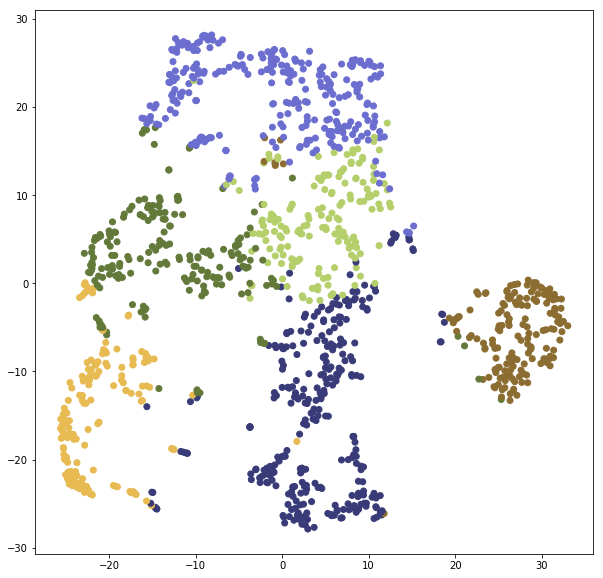

In [84]:
plt.figure(figsize=(10,10))
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum)

In [85]:
vlm.score_detection_levels(min_expr_counts=20, min_cells_express=10)
vlm.filter_genes(by_detection_levels=True)

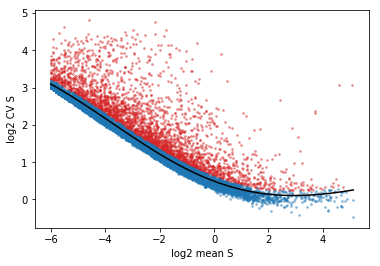

In [86]:
vlm.score_cv_vs_mean(3000, plot=True, max_expr_avg=35)

In [87]:
vlm.filter_genes(by_cv_vs_mean=True)

In [88]:
vlm.score_detection_levels(min_expr_counts=0, min_cells_express=0, min_expr_counts_U=15, min_cells_express_U=10)
vlm.score_cluster_expression(min_avg_U=0.01, min_avg_S=0.08)
vlm.filter_genes(by_detection_levels=True, by_cluster_expression=True)

In [89]:
vlm._normalize_S(relative_size=vlm.initial_cell_size,
                 target_size=np.mean(vlm.initial_cell_size))
vlm._normalize_U(relative_size=vlm.initial_Ucell_size,
                 target_size=np.mean(vlm.initial_Ucell_size))

22

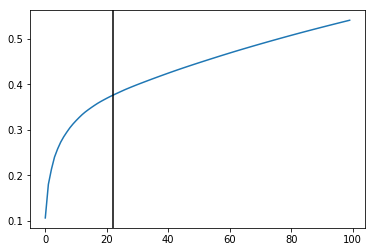

In [91]:
vlm.perform_PCA()
plt.plot(np.cumsum(vlm.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.002))[0][0]
n_comps = 22
plt.axvline(n_comps, c="k")
n_comps

In [92]:
k = 40
vlm.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8, b_maxl=k*4, n_jobs=16)

In [93]:
vlm.fit_gammas(limit_gamma=False, fit_offset=False)

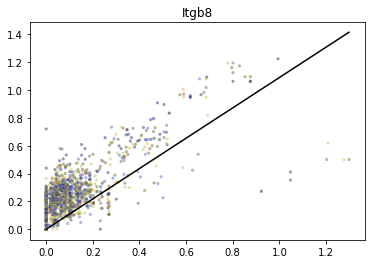

In [107]:
vlm.plot_phase_portraits(["Itgb8"])

In [108]:
vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_velocity")
vlm.extrapolate_cell_at_t(delta_t=1.)

In [109]:
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=40, knn_random=True, sampled_fraction=0.8)

In [110]:
vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)
vlm.calculate_grid_arrows(smooth=0.8, steps=(40, 40), n_neighbors=40)

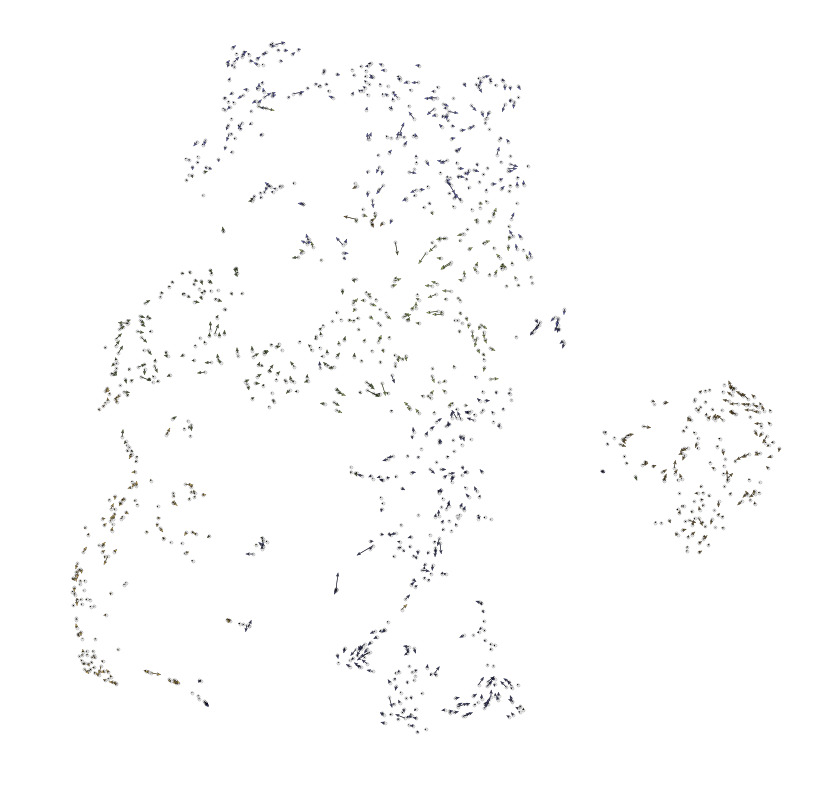

In [114]:
plt.figure(None,(14,14))
quiver_scale = 60

plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
            c="0.8", alpha=0.4, s=10, edgecolor="")

ix_choice = np.random.choice(vlm.embedding.shape[0], size=int(vlm.embedding.shape[0]/1.), replace=False)
plt.scatter(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
            c="0.8", alpha=0.4, s=10, edgecolor=(0,0,0,1), lw=0.3, rasterized=True)

quiver_kwargs=dict(headaxislength=7, headlength=11, headwidth=8,linewidths=0.25, width=0.00045,edgecolors="k", color=vlm.colorandum[ix_choice], alpha=1)
plt.quiver(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
           vlm.delta_embedding[ix_choice, 0], vlm.delta_embedding[ix_choice, 1],
           scale=quiver_scale, **quiver_kwargs)

plt.axis("off")
plt.savefig("full_arrows.pdf")

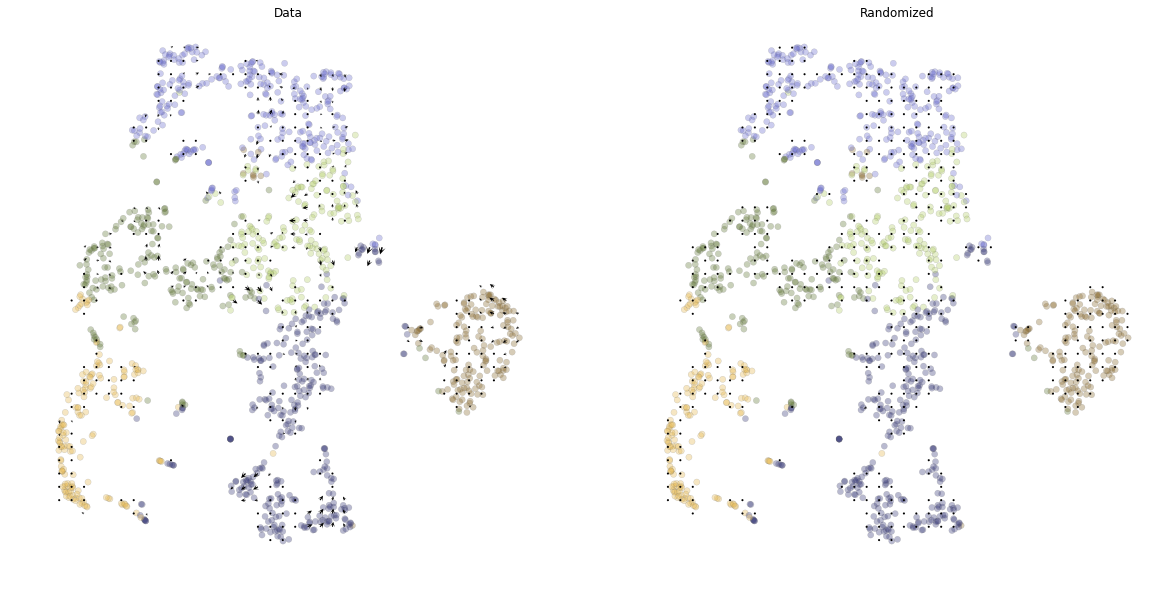

In [113]:
plt.figure(None,(20,10))
vlm.plot_grid_arrows(quiver_scale=0.48,
                     scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=2, angles='xy', scale_units='xy',
                     headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                     plot_random=True, scale_type="absolute")
plt.savefig("vectorfield.pdf")